<a href="https://colab.research.google.com/github/arshika77/snns_and_sdm_code_implementation/blob/master/LIF_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__author__ = "Devrim Celik"

"""
Interative plot, showcasing the Leaky Integrate-and-Fire Model
"""



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import  Button, Slider
#==============================================================================#

In [4]:
def LIF(_I=0.005, gl=0.16, Cm=0.0049):

    ######### Constants
    El      =   -0.065                      # resting membrane potential [V]
    thresh  =   -0.050                      # spiking threshold [V]

    ######### Experimental Setup
    # TIME
    T       =   0.100                       # total simulation length [s]
    dt      =   0.00002                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]
    # VOLTAGE
    V       =   np.empty(len(time))         # array for saving Voltage history
    V[0]    =   El                          # set initial to resting potential
    # CURRENT
    I = np.zeros(len(time))
    I[1000:4000] = _I
    ######### Measurements
    spikes  =   0                           # counter for number of spikes

    ######### Simulation
    for i in range(1, len(time)):
        # use "I - V/R = C * dV/dT" to get this equation
        dV =  (I[i] - gl*(V[i-1]-El))/Cm
        V[i] = V[i-1] + dV*dt

        # in case we exceed threshold
        if V[i] > thresh:
            V[i-1] = 0.04   # set the last step to spike value
            V[i] = El       # current step is resting membrane potential
            spikes += 1     # count spike

    return V

def I_values(_I=0.005, time=None):
    I = np.zeros(len(time))
    I[1000:4000] = _I
    return I

#==============================================================================#

In [5]:
def start_LIF_sim():
    # time parameters for plotting
    T       =   0.100                       # total simulation length [s]
    dt      =   0.00002                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]

    # initial parameters
    I_init  =   0.005
    gl_init =   0.16
    Cm_init =   0.0049

    # update functions for lines
    V = LIF(_I=I_init, gl=gl_init, Cm=Cm_init)
    I = I_values(_I=I_init, time=time)

    ######### Plotting
    axis_color = 'lightgoldenrodyellow'

    fig = plt.figure("Leaky Integrate-and-Fire Neuron", figsize=(14, 7))
    ax = fig.add_subplot(111)
    plt.title("Interactive Leaky Integrate-and-Fire Neuron Simulation")
    fig.subplots_adjust(left=0.1, bottom=0.32)

    # plot lines
    line = plt.plot(time, V, label="Membrane Potential")[0]
    line2 = plt.plot(time, I, label="Applied Current")[0]

    # add legend
    plt.legend(loc="upper right")

    # add axis labels
    plt.ylabel("Potential [V]/ Current [A]")
    plt.xlabel("Time [s]")

    # define sliders (position, color, inital value, parameter, etc...)
    I_slider_axis = plt.axes([0.1, 0.17, 0.65, 0.03], facecolor=axis_color)
    I_slider = Slider(I_slider_axis, '$I_{ext}$', -0.01, 0.03, valinit=I_init)

    gl_slider_axis = plt.axes([0.1, 0.12, 0.65, 0.03], facecolor=axis_color)
    gl_slider = Slider(gl_slider_axis, '$g_{L}$', 0.0, 0.3, valinit=gl_init)

    Cm_slider_axis = plt.axes([0.1, 0.07, 0.65, 0.03], facecolor=axis_color)
    Cm_slider = Slider(Cm_slider_axis, '$C_{m}$', 0.0, 0.01, valinit=Cm_init)

    # update functions
    def update(val):
        line.set_ydata(LIF(I_slider.val, gl_slider.val, Cm_slider.val))
        line2.set_ydata(I_values(I_slider.val, time=time))

    # update, if any slider is moved
    I_slider.on_changed(update)
    gl_slider.on_changed(update)
    Cm_slider.on_changed(update)

    # Add a button for resetting the parameters
    reset_button_ax = plt.axes([0.8, 0.02, 0.1, 0.04])
    reset_button = Button(
        reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')

    # event of resert button being clicked
    def reset_button_was_clicked(event):
        I_slider.reset()
        gl_slider.reset()
        Cm_slider.reset()

    reset_button.on_clicked(reset_button_was_clicked)

    plt.show()


#==============================================================================#

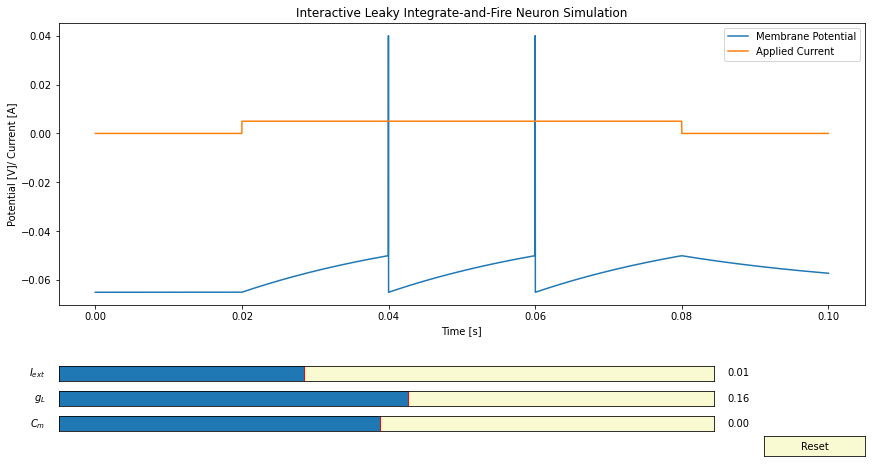

In [6]:
if (__name__ == '__main__'):
    start_LIF_sim()